In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('transaction_anomalies_dataset.csv')
df.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings


In [3]:
df.isnull().sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [5]:
df.describe()

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1038.122511,2.498000,1000.682506,12.078000,15.341000,40.641000,8.948238e+05
std,283.580055,1.115006,20.632334,4.245225,8.361258,13.819953,3.453562e+05
min,849.024392,1.000000,939.081423,5.000000,1.000000,18.000000,3.001590e+05
25%,966.028796,1.000000,986.800556,8.000000,8.000000,29.000000,5.917308e+05
50%,1002.118678,3.000000,1000.501902,12.000000,16.000000,41.000000,8.876645e+05
75%,1033.143657,3.000000,1015.155595,16.000000,22.000000,53.000000,1.178102e+06
max,3227.459108,4.000000,1073.154036,19.000000,29.000000,64.000000,1.499670e+06


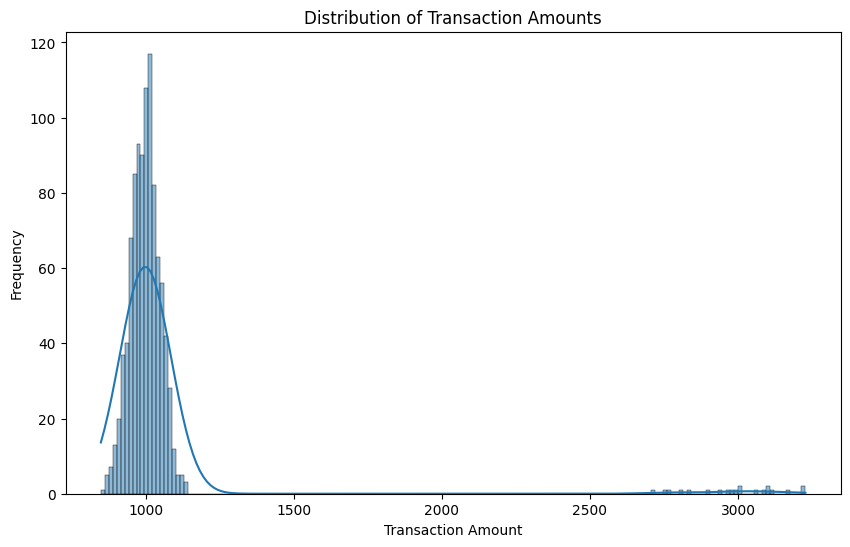

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Transaction_Amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

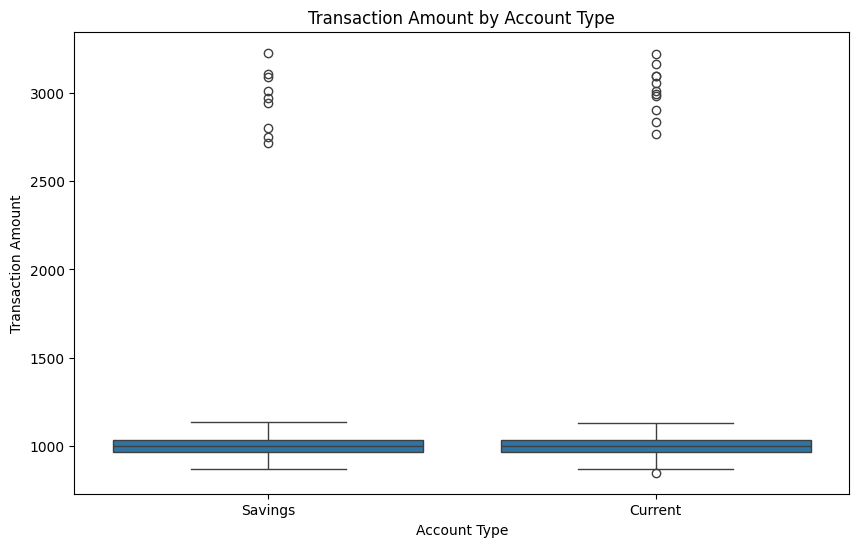

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Account_Type', y='Transaction_Amount', data=df)
plt.title('Transaction Amount by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.show()

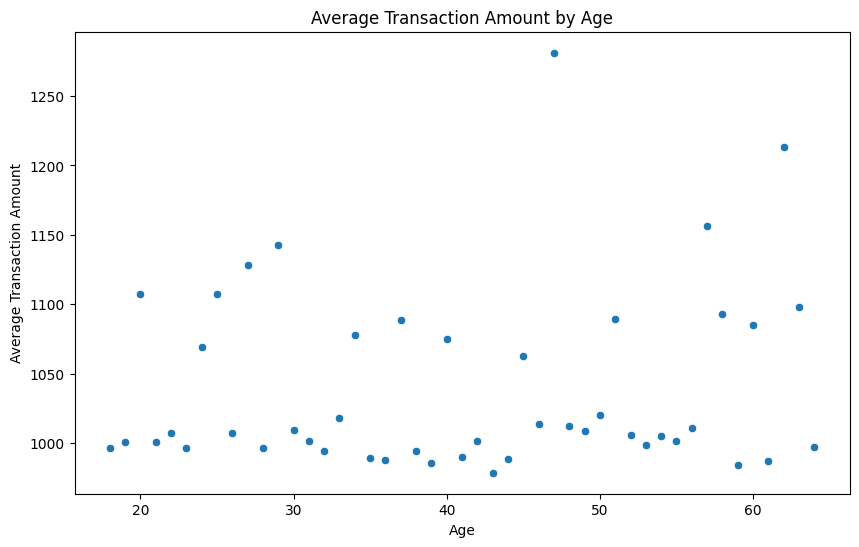

In [8]:
avg_transaction_by_age = df.groupby('Age')['Transaction_Amount'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Transaction_Amount', data=avg_transaction_by_age)
plt.title('Average Transaction Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.show()

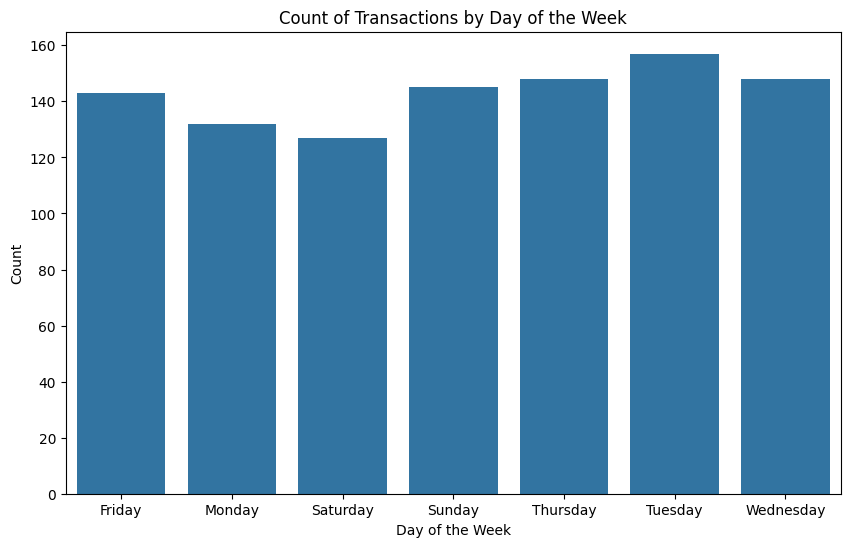

In [12]:
day_of_week_count = df['Day_of_Week'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_count.index, y=day_of_week_count.values)
plt.title('Count of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

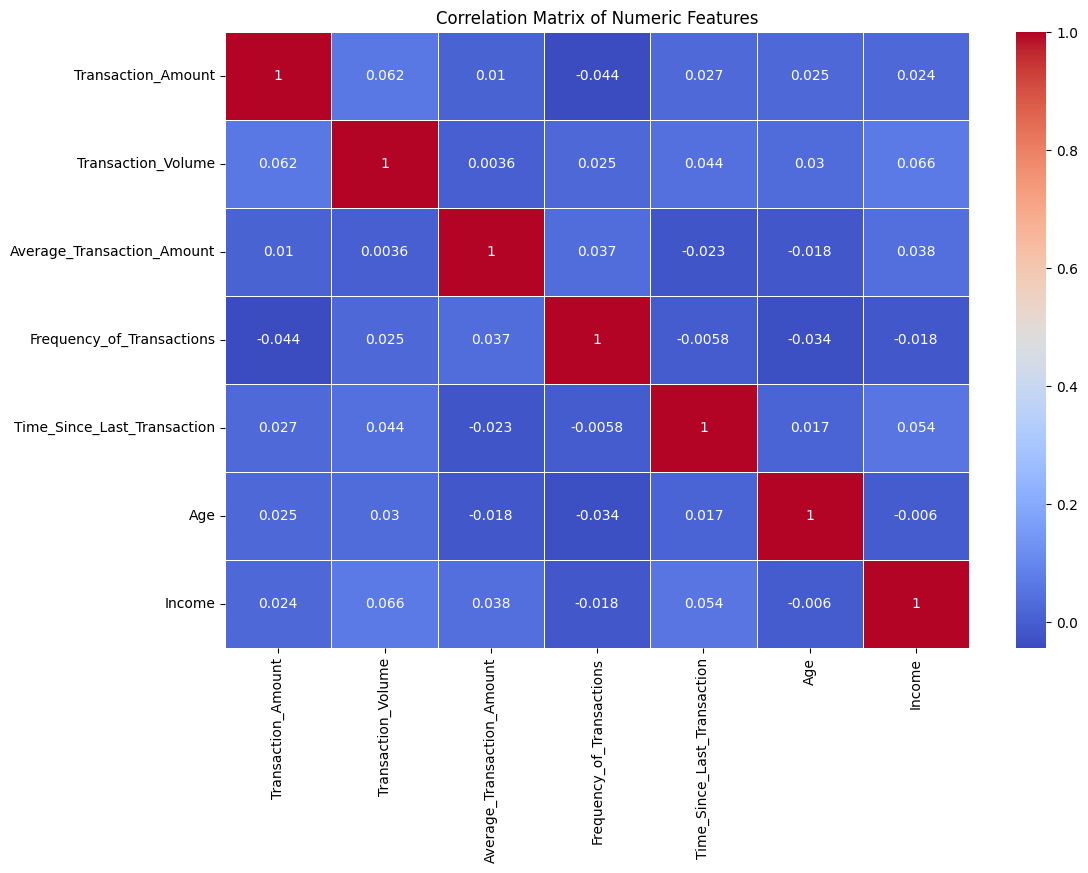

In [17]:
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

C:\Users\Umer Imtiaz\AppData\Local\Temp\ipykernel_17372\777696747.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Transaction_Amount', y='Average_Transaction_Amount',


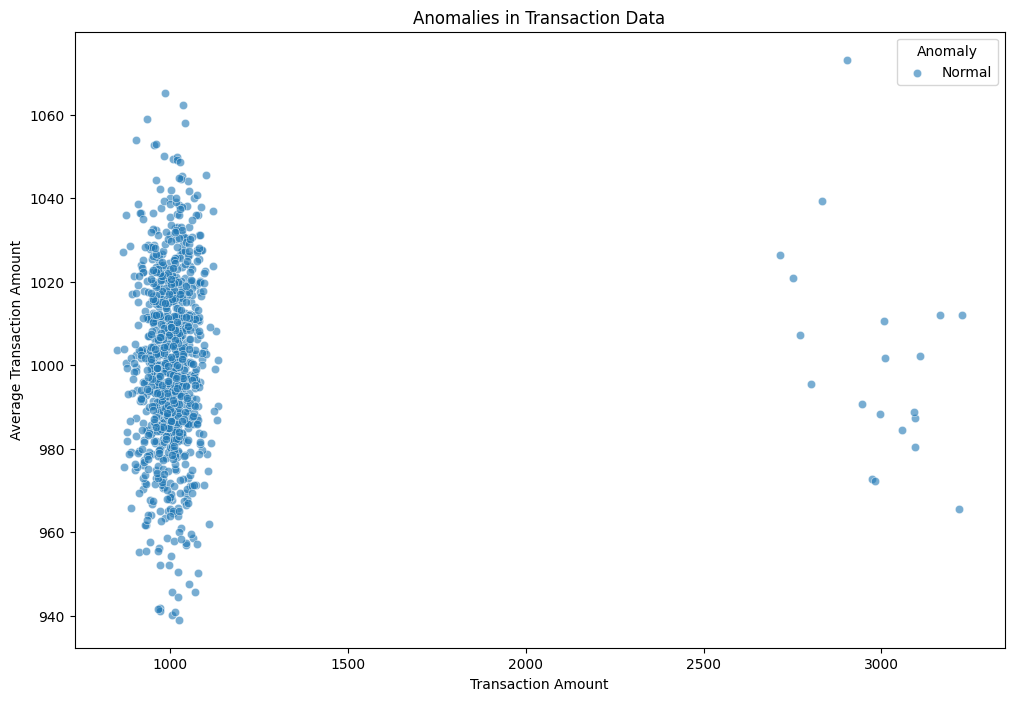

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Transaction_Amount', y='Average_Transaction_Amount', 
                data=df, palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title('Anomalies in Transaction Data')
plt.xlabel('Transaction Amount')
plt.ylabel('Average Transaction Amount')
plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'])
plt.show()

In [21]:
features = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount', 
            'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']
X = df[features]
iso_forest = IsolationForest(contamination=0.1)
df['anomaly'] = iso_forest.fit_predict(X)
df['anomaly'] = df['anomaly'].apply(lambda x: 1 if x == -1 else 0)
anomaly_ratio = df['anomaly'].mean()

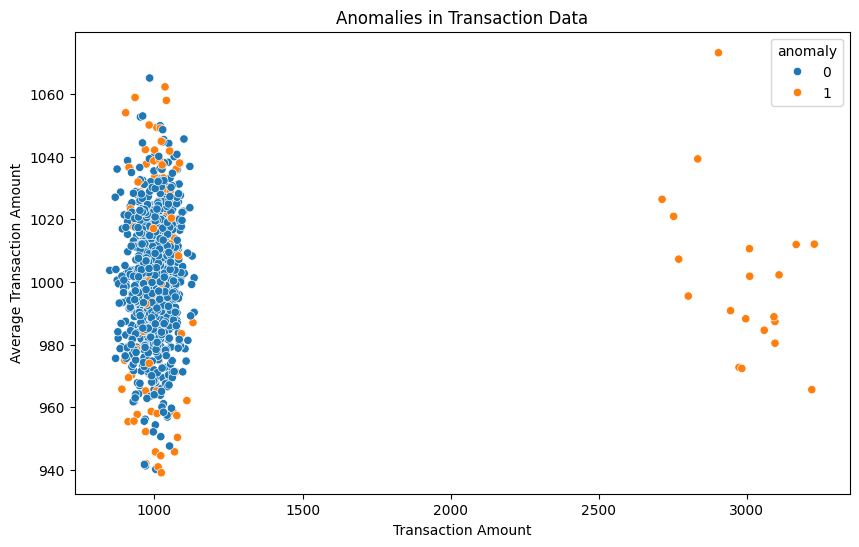

0.1

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Transaction_Amount', y='Average_Transaction_Amount', hue='anomaly', data=df)
plt.title('Anomalies in Transaction Data')
plt.xlabel('Transaction Amount')
plt.ylabel('Average Transaction Amount')
plt.show()

anomaly_ratio

In [24]:
true_labels = df['anomaly']
classification_rep = classification_report(true_labels, df['anomaly'], target_names=['Normal', 'Anomaly'])
print(classification_rep)

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       900
     Anomaly       1.00      1.00      1.00       100

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

